In [1]:
from ssfa_utils import * # file containing various secondary functions
from numerical_analysis import * # my personal module with various numerical analysis functions

1.986,0.721,1.562,0.818


2.000,0.960,0.321,1.503,0.583,0.397


2.000,1.000,0.500,0.100,1.500,0.500,0.333,0.250


0.000000,-0.005516,-0.012628,-0.025349,-0.047310,-0.080350,-0.124876,-0.180440,-0.246151,-0.320941,-0.403706,-0.493385,-0.588995,-0.689649,-0.794555,-0.903016,-1.014418,-1.128226,-1.243973,-1.361253,-1.479711,-1.599042,-1.718979,-1.839292,-1.959779,-2.080267,-2.200607,-2.320669,-2.440341,-2.559525,-2.678140,-2.796115,-2.913387,-3.029906,-3.145627,-3.260514,-3.374537,-3.487668,-3.599889,-3.711182,-3.821535,0.000000,0.000002,0.000008,0.000017,0.000033,0.000053,0.000078,0.000106,0.000136,0.000167,0.000200,0.000233,0.000266,0.000299,0.000332,0.000365,0.000397,0.000429,0.000460,0.000490,0.000519,0.000548,0.000575,0.000603,0.000629,0.000654,0.000679,0.000704,0.000727,0.000750,0.000772,0.000794,0.000815,0.000835,0.000855,0.000874,0.000893,0.000911,0.000928,0.000946,0.000962


Most accurate approximation: 4 terms


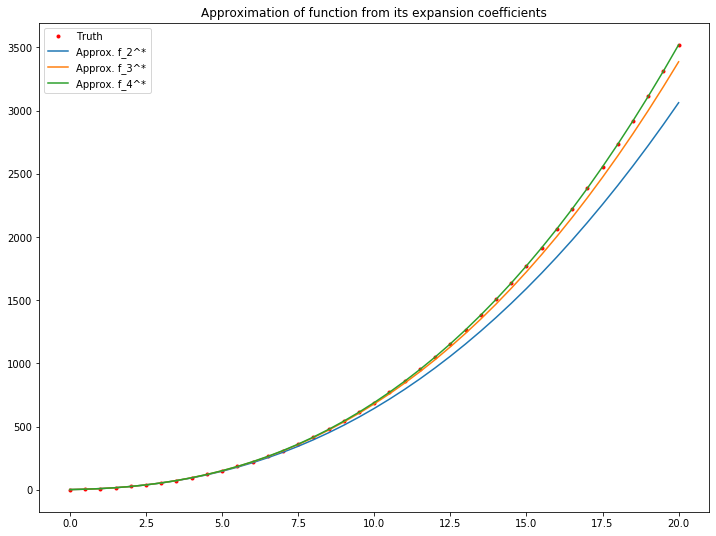

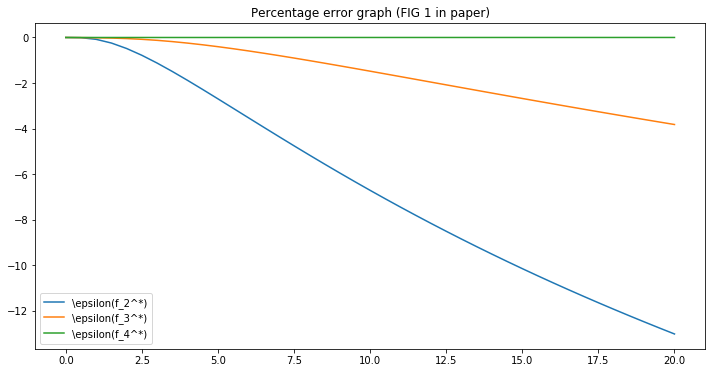

In [5]:
def self_similar_factor_approximants(xpsn_c, # Derivatives of the function at x=0
                                     xs, # nodes where the function is known
                                     ys, # values of the function at the nodes
                                     z=frange(0,1,0.1), #extrapolation points
                                     unit_test=False,
                                     verbose=False):
    '''
    This code is my rendition of the following paper:
    Gluzman S, Yukalov VI, Sornette D, Self-similar factor approximants, Phys. Rev. E 2003; 67: 026109.
    
    Further papers:
    Yukalov VI, Gluzman S, Sornette D, Summation of Power Series by Self-Similar Factor Approximants, Physica A 2003; 328: 409–438.
    Yukalov, VI, Yukalova EP, Method of self-similar factor approximants, Phys. Lett. A 2007; 368: 341–347.
    Yukalov VI, Gluzman S, Optimisation of self-similar factor approximants, Mol.Phys. 2009; 107: 2237–2244.
    '''
    
    # The unit test is done against Yukalov, Sornette and Gluzman (2003) example A.
    UTF = lambda x: pow(1+2*x, 3/2)*pow(1+x, 1/2)*pow(1+0.5*x, 1/3)*pow(1+0.1*x, 1/4) #Unit test function
    
    def f(k, x):
        return 1. * sum([xpsn_c[n] * pow(x, n)  for n in range(0, k+1)])

    def 𝜑_kp(k, p, x): #factor function
        return 1+b[k][p]*x #for p = 1, 2... k >= 1

    def Φ_kp(k, p, x, s): #Fractal transform
        return 𝜑_kp(x) * pow(x, s)

    def 𝜑ˉ_kp(k, p, x, A, n):
        return pow(1+A[p]*x, n[p])

    def fˉ_k(k, x, A, n):
        return 1. * prod([𝜑ˉ_kp(k, p, x, A, n) for p in range(0, k)])

    def fs_k(k, x, A, n):
        try:
            return 1. * prod([pow(1+A[p]*x, n[p]) for p in range(0, k)])
        except:
            return float("inf")

    def b_n(n, x):
        ps = sum([xpsn_c[m] * pow(x, m)   for m in range(0, len(xpsn_c))]) #power series
        d = [ps] + [factorial(n)*xpsn_c[n] for n in range(1, n+1)]

        sc = pow(-1, max(0, n-1))/factorial(max(0, n-1))
        
        if x > 1:
            sc = x

        #Faa Di Bruno's formula for logarithmic differentiation
        if n == 0:
            return sc * ps

        if n == 1:
            return sc * (d[1] / ps)

        elif n == 2:
            return sc * (d[2]/ps - pow(d[1]/ps, 2))

        elif n == 3:
            return sc * ((d[3]/ps) - 3 * (d[1]*d[2])/pow(ps, 2) + 2 * pow(d[1]/ps, 3))

        elif n == 4:
            return sc * (d[4]/d[0] - 4*(d[1]*d[3]/pow(ps, 2)) - 3 *pow(d[2]/ps, 2) + 12 * (pow(d[1],2)*d[2]/pow(ps,3))-6*pow(d[1]/ps,4))

        elif n == 5:
            cnst = [1,+24,-5,-10,+20,-60,+30]
            qtts = [d[5]/d[0],
                    pow(d[1], 5)/pow(d[0], 5),
                    (d[4]*d[1])/pow(d[0], 2),
                    (d[3]*d[2])/pow(d[0], 2),
                    (d[3]*pow(d[1], 2))/pow(d[0], 3),
                    (pow(d[1], 3)*d[2])/pow(d[0], 4),
                    (d[1]*pow(d[2], 2))/pow(d[0], 3)]

            ef = np.dot(cnst, qtts)
            return sc * ef

        elif n == 6:
            cnst = [1,-10,+30,-120,-6,-15,+30,-120,+360,-270,+120]
            qtts = [d[6]/d[0], 
                    pow(d[3], 2)/pow(d[0], 2), 
                    pow(d[2], 3)/pow(d[0], 3), 
                    pow(d[1], 6)/pow(d[0], 6), 
                    (d[5]*d[1])/pow(d[0], 2), 
                    (d[4]*d[2])/pow(d[0], 3),
                    (d[4]*pow(d[1], 2))/pow(d[0], 3), 
                    (d[3]*pow(d[1], 3))/pow(d[0], 4),
                    (pow(d[1], 4)*d[2])/pow(d[0], 5), 
                    (pow(d[1], 2)*pow(d[2], 2))/pow(d[0], 4), 
                    (d[3]*d[1]*d[2])/pow(d[0], 3)]
            ef = np.dot(cnst, qtts)
            return sc*ef

        elif n == 7:
            cnst = [1,720,-7,-21,+42,-35,-210,+210,+840,+140,-2520,+2520,-630,+210,-1260]
            qtts = [d[7]/d[0],
                    pow(d[1], 7)/pow(d[0], 7),
                    (d[6]*d[1])/pow(d[0], 2),
                    (d[5]*d[2])/pow(d[0], 2),
                    (d[5]*pow(d[1], 2))/pow(d[0], 3),
                    (d[3]*d[4])/pow(d[0], 2),
                    (d[4]*pow(d[1], 3))/pow(d[0], 4),
                    (d[3]*pow(d[2], 2))/pow(d[0], 3),
                    (d[3]*pow(d[1], 4))/pow(d[0], 5),
                    (pow(d[3],2)*d[1])/pow(d[0], 3),
                    (pow(d[1],5)*d[2])/pow(d[0], 6),
                    (pow(d[1],3)*pow(d[2], 2))/pow(d[0], 5),
                    (d[1]*pow(d[2],3))/pow(d[0], 4),
                    (d[4]*d[1]*d[2])/pow(d[0], 3),
                    (d[3]*pow(d[1],2)*d[2])/pow(d[0], 4)
                   ]
            ef = np.dot(cnst, qtts)
            return sc*ef

        elif n == 8:
            cnst = [1,-35,-630,-5040,-8,-28,+56,-56,-336,+420,+1680,+560,-6720,-1680,+20160,-25200,+10080,+336,+560,-2520,+13440,-5040]
            qtts = [d[8]/d[0],                               #1
                    pow(d[4], 2)/pow(d[0], 2),               #2
                    pow(d[2], 4)/pow(d[0], 4),               #3
                    pow(d[1], 8)/pow(d[0], 8),               #4
                    (d[7]*d[1])/pow(d[0], 2),                #5
                    (d[6]*d[2])/pow(d[0], 2),                #6
                    (d[6]*pow(d[1], 2))/pow(d[0], 3),        #7
                    (d[3]*d[5])/pow(d[0], 2),                #8
                    (d[5]*pow(d[1], 3))/pow(d[0], 4),        #9
                    (d[4]*pow(d[2], 2))/(pow(d[0], 3)),      #10
                    (d[4]*pow(d[1], 4))/pow(d[0], 5),        #11
                    pow(d[3], 2)*d[2]/pow(d[0], 3),          #12
                    d[3]*pow(d[1], 5)/pow(d[0], 6),          #13
                    pow(d[3], 2)*pow(d[1], 2)/pow(d[0], 4),  #14
                    pow(d[1], 6)*pow(d[2], 1)/pow(d[0], 7),  #15
                    pow(d[1], 4)*pow(d[2], 2)/pow(d[0], 6),  #16
                    pow(d[1], 2)*pow(d[2], 3)/pow(d[0], 5),  #17
                    d[5]*d[1]*d[2]/pow(d[0], 3),             #18
                    d[3]*d[4]*d[1]/pow(d[0], 3),             #19
                    d[4]*pow(d[1], 2)*d[2]/pow(d[0], 4),     #20
                    d[3]*pow(d[1], 3)*d[2]/pow(d[0], 5),     #21
                    d[3]*d[1]*pow(d[2], 2)/pow(d[0], 4)      #22          
            ]
            ef = np.dot(cnst, qtts)
            return sc*ef

        elif n == 9:
            cnst = [1, +560, +40320, -9, 
                    -36, +72, -84, -504, 
                    -126, +756, +3024, -15120,
                    +630, -7560, +60480,
                    +20160, -181440,+272160,
                    -151200,+22680,+504,
                    +1008,-4536,+2520,
                    -7560, +30240, -11340,
                    -151200, +90720, -15120]
            qtts = [d[9]/d[0],
                    pow(d[3], 3)/pow(d[0], 3),
                    pow(d[1], 9)/pow(d[0], 9),
                    pow(d[8], 1)*pow(d[1], 1)/pow(d[0], 2),
                    pow(d[7], 1)*pow(d[2], 1)/pow(d[0], 2),
                    pow(d[7], 1)*pow(d[1], 2)/pow(d[0], 3),
                    pow(d[3], 1)*pow(d[6], 1)/pow(d[0], 2),
                    pow(d[6], 1)*pow(d[1], 3)/pow(d[0], 4),
                    pow(d[4], 1)*pow(d[5], 1)/pow(d[0], 2),
                    pow(d[5], 1)*pow(d[2], 2)/pow(d[0], 3),
                    pow(d[5], 1)*pow(d[1], 4)/pow(d[0], 5),
                    pow(d[4], 1)*pow(d[1], 5)/pow(d[0], 6),
                    pow(d[4], 2)*pow(d[1], 1)/pow(d[0], 3),
                    pow(d[3], 1)*pow(d[2], 3)/pow(d[0], 4),
                    pow(d[3], 1)*pow(d[1], 6)/pow(d[0], 7),
                    pow(d[3], 2)*pow(d[1], 3)/pow(d[0], 5),
                    pow(d[1], 7)*pow(d[2], 1)/pow(d[0], 8),
                    pow(d[1], 5)*pow(d[2], 2)/pow(d[0], 7),
                    pow(d[1], 3)*pow(d[2], 3)/pow(d[0], 6),
                    pow(d[1], 1)*pow(d[2], 4)/pow(d[0], 5),
                    pow(d[6], 1)*pow(d[1], 1)*pow(d[2], 1)/pow(d[0], 3),
                    pow(d[3], 1)*pow(d[5], 1)*pow(d[1], 1)/pow(d[0], 3),
                    pow(d[5], 1)*pow(d[1], 2)*pow(d[2], 1)/pow(d[0], 4),
                    pow(d[3], 1)*pow(d[4], 1)*pow(d[2], 1)/pow(d[0], 3),
                    pow(d[3], 1)*pow(d[4], 1)*pow(d[1], 2)/pow(d[0], 4),
                    pow(d[4], 1)*pow(d[1], 3)*pow(d[2], 1)/pow(d[0], 5),
                    pow(d[4], 1)*pow(d[1], 1)*pow(d[2], 2)/pow(d[0], 4),
                    pow(d[3], 1)*pow(d[1], 4)*pow(d[2], 1)/pow(d[0], 6),
                    pow(d[3], 1)*pow(d[1], 2)*pow(d[2], 2)/pow(d[0], 5),
                    pow(d[3], 2)*pow(d[1], 1)*pow(d[2], 1)/pow(d[0], 4)
                   ]
            ef = np.dot(cnst, qtts)
            return sc*ef

    def test(x):
        aa = sum([m*(m-1) * xpsn_c[m] * pow(x, m-2)   for m in range(2, 9)])

        b = sum([xpsn_c[m] * pow(x, m)   for m in range(0, 9)])
        c = sum([m * xpsn_c[m] * pow(x, m-1)   for m in range(1, 9)])
        ftn =  pow(-1, 2-1)
        ftd = factorial(2-1) 
        print("n",  (ftn*aa))
        return (ftn*aa)/(ftd*1/b) - (ftn*pow(c, 2))/(ftd*1/pow(b,2))


    # Compute the coefficients A_kp and exponents n_kp
    # From the paper: "
    # A and n are control parameters. They are determined by expanding the function fˉ_k(k, x)
    # and comparing this expansion with f(x). This is called the reexpansion procedure, or accuracy-through-order relationship.
    # "
    # Programmer Note: the paper did not indicate how to solve those parameters. All it says is that "the solutions to these equations
    # involve Vandermonde determinants" but I used an n-point Gaussian quadrature rule

    '''
    Via Horner's method
    n_11 = 1
    A_11 = a1
    '''
    A = [[],[]]
    n = [[],[]]

    def lhs(nn, A, n):
        return sum(pow(xpsn_c[k][nnn], n) * n[nnn] for k in range(0, len(A)))
    
    mmts = []
    if len(xpsn_c) >= 5:
        b1 = b_n(1, 0.0000000001)
        b2 = b_n(2, 0.0000000001)
        b3 = b_n(3, 0.0000000001)
        b4 = b_n(4, 0.0000000001)
        mmts.append(b1)
        mmts.append(b2)  
        mmts.append(b3)
        mmts.append(b4)
    else:
        raise Exception("Not enough coefficients.", len(xpsn_c))
        
    if len(xpsn_c) >= 7:
        b5 = b_n(5, 0.0000000001)
        b6 = b_n(6, 0.0000000001)
        mmts.append(b5)
        mmts.append(b6)
        
    if len(xpsn_c) >= 9:
        b7 = b_n(7, 0.0000000001)
        b8 = b_n(8, 0.0000000001)
        mmts.append(b7)
        mmts.append(b8)
    
    paper_mmts = []
    if unit_test:
        mmts = [2.583333333333333] + mmts
        # Note
        # This step was necessary to reconcile the paper's results of example A
        # I matched the paper's moments from inverse Gaussian quadrature for k = 4
        # paper_mmts += [2.583333333333333, 3.6916666666666655, 6.58583333333334, 12.541916666666687, 24.5208583333334, 48.510419166666814, 96.50520858325945, 192.50260419117248]

    
    ssfa = [] #approximation values
    ssfa_err = []
    ########
    #Solve for A2p and n2p
    status = 0
    try:
        if len(mmts) >= 4:
            A2p, n2p = GaussianQuadrature(mmts[:4])
            #check that it works
            _ = [fˉ_k(2, x, A2p, n2p) for x in z]
            A.append(A2p)
            n.append(n2p)
            #calculate the error for later comparison
            err21 = [(fˉ_k(2, x, A2p, n2p) / ys[i] - 1) * 100 for (i, x) in enumerate(xs)]

            #Try the other method and pick the best approximation given the known points
            try:
                A2p, n2p = Gaussian_quadrature_nodes_weights([b1, b2, b3, b4])
                #check that it works
                _ = [fˉ_k(2, x, A2p, n2p) for x in z]
                err22 = [(fˉ_k(2, x, A2p, n2p) / ys[i] - 1) * 100 for (i, x) in enumerate(xs)]
                if sum(err22) < sum(err21):
                    A[-1] = A2p
                    n[-1] = n2p

                status += 1

            except Exception as err:
                if verbose:
                    print("Could not compare 2nd order approximation.", err)

            if verbose:
                print_Table_V([A[-1], n[-1]], 3, title="Approximant with 4 terms")

    except Exception as err:
        #If the first method failed, try the second method
        if verbose:
            print("Could not generate 2nd order approximation. (1/2)", err)
        try:
            if len(mmts) >= 4:
                A2p, n2p = Gaussian_quadrature_nodes_weights([b1, b2, b3, b4])
                #check that it works
                _ = [fˉ_k(2, x, A2p, n2p) for x in z]

                A.append(A2p)
                n.append(n2p)

                status += 2

                if verbose:
                    print_Table_V([A2p, n2p], 3, title="Approximant with 4 terms")
                    
        except Exception as err:
            if verbose:
                print("Could not generate 2nd order approximation. (2/2)", err)

                
    if status > 0:
        ssfa.append([fˉ_k(2, x, A[-1], n[-1]) for x in xs])
        ssfa_err.append(sum([pow(fˉ_k(2, x, A[-1], n[-1]) - ys[i], 2) for (i, x) in enumerate(xs)]))
    else:
        A.append([])
        n.append([])
        ssfa_err.append(float('inf'))
        
        
    ########
    #Solve for A3p and n3p
    status = 0
    try:
        if len(mmts) >= 6:
            A3p, n3p = GaussianQuadrature([b1, b2, b3, b4, b5, b6])
            #check that it works
            _ = [fˉ_k(3, x, A3p, n3p) for x in z]
            A.append(A3p)
            n.append(n3p)

            #calculate the error for later comparison
            err31 = [(fˉ_k(3, x, A3p, n3p) / ys[i] - 1) * 100 for (i, x) in enumerate(xs)]

            #Try the other method and pick the best approximation given the known points
            try:
                A3p, n3p = Gaussian_quadrature_nodes_weights([b1, b2, b3, b4, b5, b6])
                #check that it works
                _ = [fˉ_k(3, x, A3p, n3p) for x in z]

                err32 = [(fˉ_k(3, x, A3p, n3p) / ys[i] - 1) * 100 for (i, x) in enumerate(xs)]
                if sum(err32) < sum(err31): #if error is smaller, replace
                    A[-1] = A3p
                    n[-1] = n3p

                status += 3

            except Exception as err:
                if verbose:
                    print("Could not compare 3rd order approximation.", err)

            if verbose:
                print_Table_V([A[-1], n[-1]], 3, title="Approximant with 6 terms")

    except Exception as err:
        if verbose:
            print("Could not generate 3rd order approximation. (1/2)", err)
            
        try:
            if len(mmts) >= 6:
                A3p, n3p = GaussianQuadrature([b1, b2, b3, b4, b5, b6])
                #check that it works
                _ = [fˉ_k(3, x, A3p, n3p) for x in z]

                A.append(A3p)
                n.append(n3p)

                status += 4

                if verbose:
                    print_Table_V([A3p, n3p], 3, title="Approximant with 6 terms")
        except Exception as err:
            if verbose:
                print("Could not generate 3rd order approximation. (2/2)", err)

    if status > 0:
        ssfa.append([fˉ_k(3, x, A[-1], n[-1]) for x in xs])
        ssfa_err.append(sum([pow(fˉ_k(3, x, A[-1], n[-1]) - ys[i], 2) for (i, x) in enumerate(xs)]))
    else:
        A.append([])
        n.append([])
        ssfa_err.append(float('inf'))
        
    #########
    #Solve for A4p and n4p
    status = 0
    try:
        if len(mmts) >= 8:
            if unit_test:
                A4p, n4p =  GaussianQuadrature(mmts)
            else:
                A4p, n4p = Gaussian_quadrature_nodes_weights(mmts)
            #check that it works
            _ = [fˉ_k(4, x, A4p, n4p) for x in z]

            A.append(A4p)
            n.append(n4p)

            #calculate the error for later comparison
            err41 = [(fˉ_k(4, x, A4p, n4p) / ys[i] - 1) * 100 for (i, x) in enumerate(xs)]

            #Try the other method and pick the best approximation given the known points
            try:
                A4p, n4p = Gaussian_quadrature_nodes_weights(mmts)
                #check that it works
                _ = [fˉ_k(4, x, A4p, n4p) for x in z]

                err42 = [(fˉ_k(4, x, A4p, n4p) / ys[i] - 1) * 100 for (i, x) in enumerate(xs)]
                if sum(err42) < sum(err41): #if error is smaller, replace
                    A[-1] = A4p
                    n[-1] = n4p

                status += 5

            except Exception as err:
                if verbose:
                    print("Could not compare 4th order approximation.", err)

            if verbose:
                print_Table_V([A[-1], n[-1]], 3, title="Approximant with 8 terms")
                 
    except Exception as err:
        if verbose:
            print("Could not generate 4th order approximation. (1/2)", err)
            
        try:
            if len(mmts) >= 8:
                A4p, n4p = GaussianQuadrature(mmts)
                #check that it works
                _ = [fˉ_k(4, x, A4p, n4p) for x in z]

                A.append(A4p)
                n.append(n4p)

                status += 6
                if verbose:
                    print_Table_V([A4p, n4p], 3, title="Approximant with 8 terms")
                
        except Exception as err:
            if verbose:
                print("Could not generate 4th order approximation. (2/2)", err)
                
    
    if status > 0:
        ssfa.append([fˉ_k(4, x, A[-1], n[-1]) for x in xs])
        ssfa_err.append(sum([pow(fˉ_k(4, x, A[-1], n[-1]) - ys[i], 2) for (i, x) in enumerate(xs)]))
    else:
        A.append([])
        n.append([])
        ssfa_err.append(float('inf'))
        
        
    if unit_test:
        
        xt = frange(0, 20, 0.5) #extrapolation range
        ssfa2 = [fˉ_k(2, x, A[2], n[2]) for x in xt]
        ssfa3 = [fˉ_k(3, x, A[3], n[3]) for x in xt]
        ssfa4 = [fˉ_k(4, x, A[4], n[4]) for x in xt]
        
        err2 = [(fˉ_k(2, x, A[2], n[2]) / UTF(x) - 1) * 100 for x in xt]
        err3 = [(fˉ_k(3, x, A[3], n[3]) / UTF(x) - 1) * 100 for x in xt]
        err4 = [(fˉ_k(4, x, A[4], n[4]) / UTF(x) - 1) * 100 for x in xt]
        # For the unit test, the error with k=4 should vanish
        print_Table_V([err3, err4], 6, title="Errors at k= 3 and k=4 (should vanish at k=4)")
        
        # PLotting
        fig2, ax2 = plt.subplots(figsize=(12,9))
        cmap = plt.cm.viridis
        norm = matplotlib.colors.Normalize(vmin=1, vmax=len(xpsn_c))
        ax2.set_xlabel('')
        ax2.set_ylabel('')
        ax2.plot(xt, [UTF(x) for x in xt], 'r.', label="Truth")
        ax2.plot(xt, ssfa2, label="Approx. f_2^*")
        ax2.plot(xt, ssfa3, label="Approx. f_3^*")
        ax2.plot(xt, ssfa4, label="Approx. f_4^*")
        ax2.set_title("Approximation of functionfrom its expansion coefficients")
        ax2.legend()
    

        fig3, ax3 = plt.subplots(figsize=(12,6))
        cmap = plt.cm.viridis
        norm = matplotlib.colors.Normalize(vmin=1, vmax=len(xpsn_c))
        ax3.set_xlabel('')
        ax3.set_ylabel('')
        ax3.plot(xt, err2, label="\epsilon(f_2^*)")
        ax3.plot(xt, err3, label="\epsilon(f_3^*)")
        ax3.plot(xt, err4, label="\epsilon(f_4^*)")
        ax3.set_title("Percentage error graph (FIG 1 in paper)")
        ax3.legend()
        #assert np.isclose(sum(err4), 0, 10)

    #Return the extrapolation over the specified range with the most accurate method
    _, idx1     = sorted((val, idx) for (idx, val) in enumerate(ssfa_err))[0]
    if verbose:
        print("Most accurate approximation: %d terms" % (idx1+2))

    return [fˉ_k(idx1+2, x, A[idx1+2], n[idx1+2]) for x in z]
    
    

# If the function is k-time differentiable, take the Macaulin series
# Example A (exact result)
dervs = [1, 3.6916666666666655, 7.04257, 2.45725, 0.606084, -10.8648, 104.405, -1106.96, 13498.5]
ec = [dervs[i]/factorial(i) if i > 1 else dervs[i] for i in range(0, len(dervs))]
xs = frange(-0.05, 0.05, 0.01)
F = lambda x: pow(1+2*x, 3/2)*pow(1+x, 1/2)*pow(1+0.5*x, 1/3)*pow(1+0.1*x, 1/4) #Unit test function
f_x = [F(x) for x in xs]

approximation = self_similar_factor_approximants(ec, 
                                                 xs,
                                                 f_x,
                                                 frange(0, 1, 0.1), 
                                                 unit_test=True,
                                                 verbose=True
                                                )